# Image filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [8]:
path = 'F:\DEV\IMN\TP2_IMN\dev2.jpg'

In [9]:
# read a jpg image file
A = cv.imread(path)
A = A[:,:,::-1]

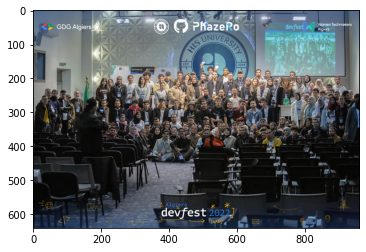

In [10]:
# show the image
plt.imshow(A)
plt.show()

2. Add a noise A of type poivre et sel, then a guassian noise using imnoise

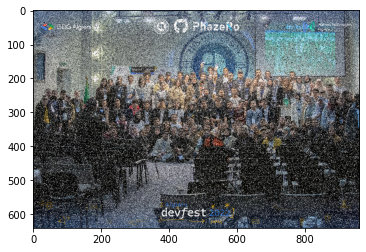

In [11]:
# add a noise of poivre et sel to the image
def add_noise_poivre_sel(image, proba):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - proba
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < proba:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
ps = add_noise_poivre_sel(A, 0.1)
# show the image
plt.imshow(ps)
plt.show()    

Adding a guassian noise to the image

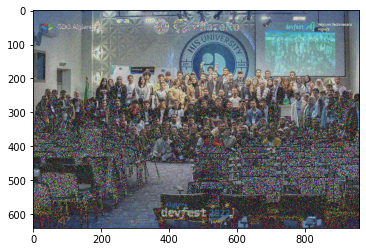

In [12]:
# add a noise of gaussien to the image
def add_noise_gaussien(image, mean, sigma):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss.astype(np.uint8)
    return noisy
# il faut jouer sur la moyenne et l'ecart type pour avoir un bon resultat
g = add_noise_gaussien(A, 0, 20)
# show the image
plt.imshow(g)
plt.show()

3. Filtering the images with a medina filter

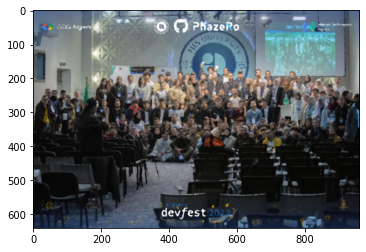

In [13]:
# filter these images with a median filter
def median_filter(image):
    output = np.zeros(image.shape, np.uint8)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            output[i][j] = np.median(image[i-1:i+2, j-1:j+2])
    return output
def median_filter2(image):
    output = cv.medianBlur(src = image,ksize = 5)
    return output
# show the image
plt.imshow(median_filter2(ps))
plt.show()

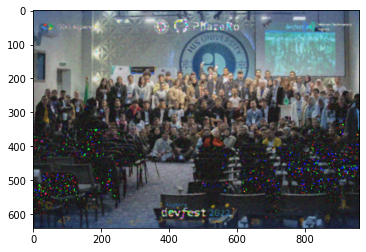

In [14]:
plt.imshow(median_filter2(g))
plt.show()

We notice that the gaussian image was harder to restore than the poivre et sel using the median filter

#### Filtering the images with a low-pass filter

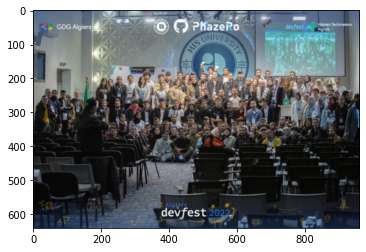

In [15]:
# filter these images with a low pass filter
def low_pass_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((3, 3), np.float32) / 9
    output = cv.filter2D(image, -1, kernel)
    return output
# show the image
plt.imshow(low_pass_filter(A))
plt.show()

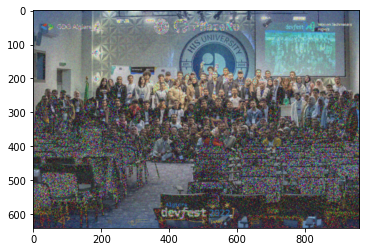

In [16]:
plt.imshow(low_pass_filter(g))
plt.show()

4. Apply a high pass filter with and without the mean

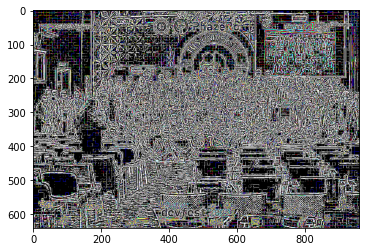

In [17]:
# Apply a high pass filter to the image with mean filter
def high_pass_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((3, 3), np.float32) / 9
    output = cv.filter2D(image, -1, kernel)
    output = image - output
    return output
# show the image
plt.imshow(high_pass_filter(A))
plt.show()


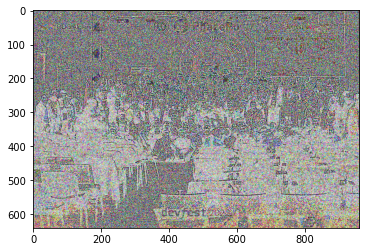

In [18]:
plt.imshow(high_pass_filter(g))
plt.show()

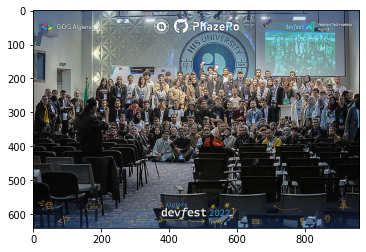

In [19]:
# Apply a high pass filter to the image without mean filter
def high_pass_filter2(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    output = cv.filter2D(image, -1, kernel)
    return output
# show the image
plt.imshow(high_pass_filter2(A))
plt.show()

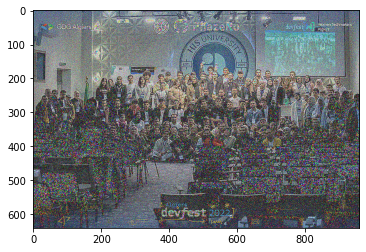

In [20]:
plt.imshow(high_pass_filter2(g))
plt.show()

    The filter without the mean is doing slightly better then the high pass filter with the mean

5. Apply the accentuator filter

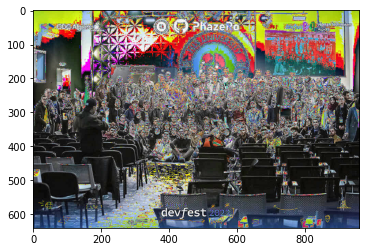

In [21]:
# Apply the accentuator filter to the image
def accentuator_filter(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    output = cv.filter2D(image, -1, kernel)
    output = image + output
    # the difference is in the + while above we have -
    return output
# show the image
plt.imshow(accentuator_filter(A))
plt.show()

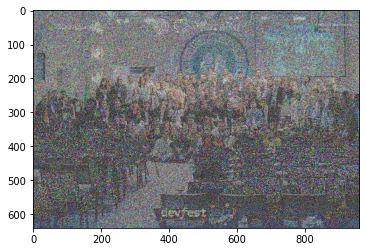

In [22]:
plt.imshow(accentuator_filter(g))
plt.show()

6. Apply an erosion using another elemnt than the window 

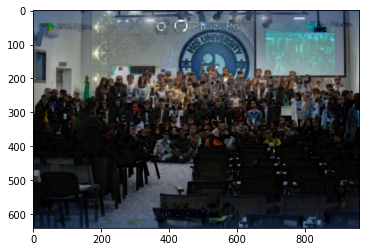

In [23]:
# Apply an erosion using a structure element other than the window  3*3
def erosion(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    output = cv.erode(image, kernel, iterations=1)
    return output
# show the image
plt.imshow(erosion(A))
plt.show()

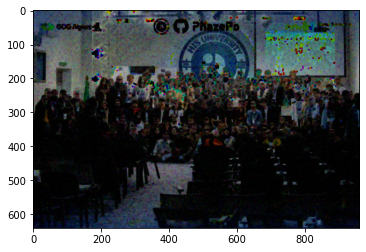

In [24]:
plt.imshow(erosion(g))
plt.show()

Use the dilatation without the 3*3 window

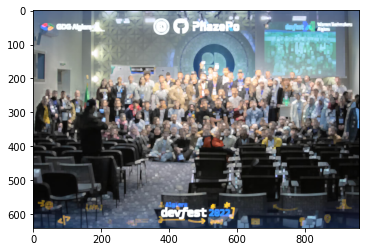

In [25]:
# Use the dilatation without the 3*3 window
def dilatation(image):
    output = np.zeros(image.shape, np.uint8)
    kernel = np.ones((5, 5), np.uint8)
    output = cv.dilate(image, kernel, iterations=1)
    return output
# show the image
plt.imshow(dilatation(A))
plt.show()

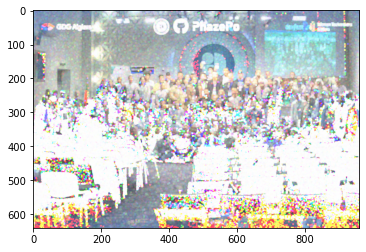

In [26]:
plt.imshow(dilatation(g))
plt.show()

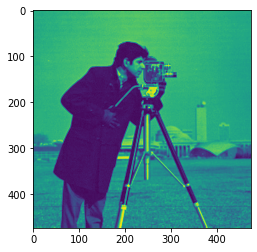

In [35]:
path_cameraman = 'F:\DEV\IMN\TP2_IMN\cameraman.jpg'
img_cam = cv.imread(path_cameraman,cv.IMREAD_GRAYSCALE)
plt.imshow(img_cam)
plt.show()

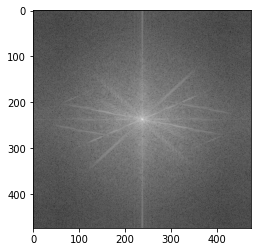

In [36]:
# Find the fourier transform of the image cameraman, show the module image and the argument
def fourier_transform(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    # count the phase spectrum
    phase_spectrum = np.angle(fshift)
    return magnitude_spectrum, phase_spectrum
# show the image
magnitude_spectrum, phase_spectrum = fourier_transform(img_cam)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

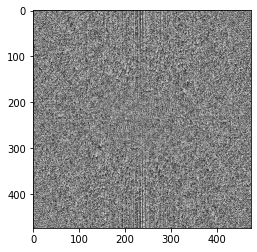

In [37]:
plt.imshow(phase_spectrum, cmap = 'gray')
plt.show()

8. Find the fourier transform of the image trui

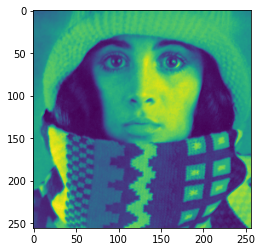

In [38]:
# find the fourier transform of the image trui
path_trui = "trui.png"
img_trui = cv.imread(path_trui,cv.IMREAD_GRAYSCALE)
plt.imshow(img_trui)

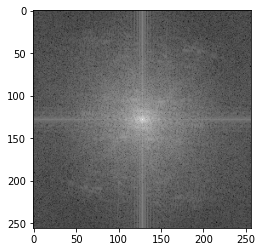

In [39]:
# show the module image
magnitude_spectrum_trui, phase_spectrum_trui = fourier_transform(img_trui)
plt.imshow(magnitude_spectrum_trui, cmap = 'gray')
plt.show()

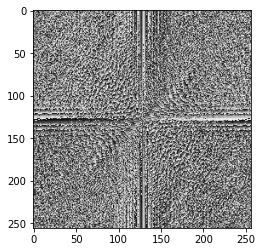

In [40]:
# show the argument image
plt.imshow(phase_spectrum_trui, cmap = 'gray')
plt.show()

9. Construct a third image that has a module equal to that of the image cameraman and an argument of trui

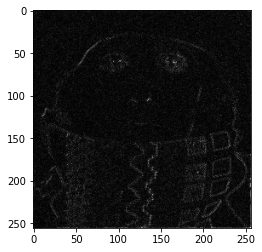

In [41]:
# Construct a third image that has a module equal to that of the image cameraman and an argument of trui
def construct_image(magnitude_spectrum, phase_spectrum):
    # we use the magnitude spectrum of the cameraman image and the phase spectrum of the trui image
    # they should have the same size
    # fix the size of the phase spectrum
    phase_spectrum = phase_spectrum[0:magnitude_spectrum.shape[0], 0:magnitude_spectrum.shape[1]]
    # fix the size of the magnitude spectrum
    magnitude_spectrum = magnitude_spectrum[0:phase_spectrum.shape[0], 0:phase_spectrum.shape[1]]
    fshift = magnitude_spectrum * np.exp(1j*phase_spectrum)
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
# show the image
img_back = construct_image(magnitude_spectrum, phase_spectrum_trui)
plt.imshow(img_back, cmap = 'gray')

10. Generate the fourier transorm of a low pass filter with the same size as cameraman, apply this filter to the image in the frequential domain

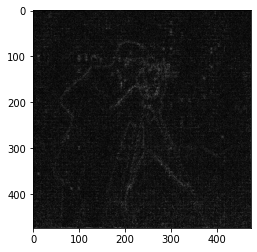

In [51]:
# Generate the fourier transorm of a low pass filter with the same size as cameraman
def low_pass_filter_fourier(image, frequency):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-frequency:crow+frequency, ccol-frequency:ccol+frequency] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
# apply the low pass fourier filter to the cameraman image in the frequential domain
res = low_pass_filter_fourier(magnitude_spectrum, 510)
new_img = construct_image(res,phase_spectrum)
plt.imshow(new_img, cmap = 'gray')
plt.show()

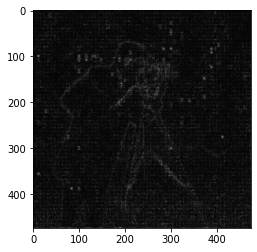

In [57]:
# low pass filter fourier transform

def high_pass_filter_fourier2(image, frequency):
    """
    Apply a high-pass filter to the given image.

    Parameters:
        image (numpy array): The input image.
        frequency (int): The cutoff frequency of the filter.

    Returns:
        The filtered image.
    """
    # Perform 2D FFT
    image_fft = np.fft.fft2(image)

    # Shift zero frequency to the center
    image_fft = np.fft.fftshift(image_fft)

    # Create a high-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    mask[crow - frequency:crow + frequency, ccol - frequency:ccol + frequency] = 1

    # Apply the mask to the FFT image
    image_fft *= mask

    # Inverse FFT and shift zero frequency back to the corner
    filtered_image = np.fft.ifftshift(np.fft.ifft2(image_fft))

    # Return the real part of the inverse FFT image
    return np.abs(filtered_image)
# apply the low pass fourier filter to the cameraman image in the frequential domain
res = high_pass_filter_fourier2(magnitude_spectrum, 200)
new_img = construct_image(res,phase_spectrum)
plt.imshow(new_img, cmap = 'gray')
plt.show()

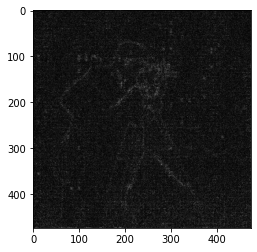

In [55]:
def high_pass_filter_fourier(image, frequency):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = int(rows/2), int(cols/2)
    fshift[crow-frequency:crow+frequency, ccol-frequency:ccol+frequency] = 1
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
res = high_pass_filter_fourier(magnitude_spectrum, 150)
new_img = construct_image(res,phase_spectrum)
plt.imshow(new_img, cmap = 'gray')
plt.show()

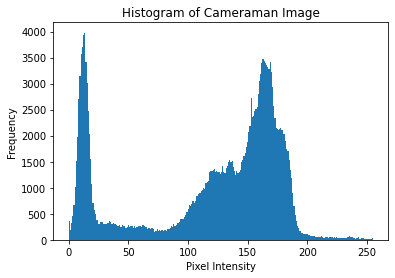

In [58]:
# tracer l'histogramme de l'image cameraman
plt.hist(img_cam.ravel(), bins=256, range=(0, 255))
plt.title('Histogram of Cameraman Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# translater cet histogramme a droite et a gauche et afficher l'image obtenue a chaque fois
# Compute the histogram of the image
from skimage import data, exposure
hist, bins = exposure.histogram(img_cam)

# Display the original image and its histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_cam, cmap='gray')
ax[0].set_title('Original Image')
ax[1].plot(bins, hist)
ax[1].set_title('Histogram')
plt.show()

# Stretch the contrast to the right
streched_right = exposure.rescale_intensity(img_cam, in_range=(0, 255), out_range=(0, 200))
hist_streched_right, bins_streched_right = exposure.histogram(streched_right)

# Display the image and its histogram after stretching to the right
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(streched_right, cmap='gray')
ax[0].set_title('Image stretched to the right')
ax[1].plot(bins_streched_right, hist_streched_right)
ax[1].set_title('Histogram after stretching to the right')
plt.show()

# Stretch the contrast to the left
streched_left = exposure.rescale_intensity(img_cam, in_range=(0, 255), out_range=(55, 255))
hist_streched_left, bins_streched_left = exposure.histogram(streched_left)

# Display the image and its histogram after stretching to the left
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(streched_left, cmap='gray')
ax[0].set_title('Image stretched to the left')
ax[1].plot(bins_streched_left, hist_streched_left)
ax[1].set_title('Histogram after stretching to the left')
plt.show()

In [ ]:
# telecharger l'image thumb_pout 
# appliquer l'egalisation de son histogramme 
# afficher l'image traitée et son nouvel histogramme